## Perceptron ##
Perceptron is used in binary classification. If data is linearly separable in two groups then Perceptron states that there exists an hyperplan separating the data

Input: $x_i = [x_{i1}, x_{i2}, ..., x_{in}]$  
Weights: $w = [w_1, w_2, .., w_n]$    
Output: $s_i$ = $\mathbf{w}^T$$x_i$ + b  
Prediction: $p_i$ = $h(s_i)$ = sign($\mathbf{W}^T$$x_i$ + b ) = 1 if $s_i >= 0$ else -1

Now we can rewrite **$x_i = [1, x_{i1}, x_{i2}, ..., x_{in}]$ and w = $[w_0, w_1, .., w_n]$**  
So now we can write **$s_i$ =  $\mathbf{w}^T$$x_i$**

### Training ###
Consider an training example $x_i$ with prediction as $p_i$ and label $y_i$. There are following possible outcomes

|$p_i$|$y_i$|correct prediction |
|:---:|:---:|:-----------------:|
|  1  |  1  |        Y          |
|  1  |  -1 |        N          |
|  -1 |  1  |        N          |
|  -1 |  -1 |        Y          |

If prediction is wrong then $y_ip_i$ < 0. Hence we need to update our weights if  $y_ip_i$ < 0

```
    if yi*pi < 0:
        w = w + yixi
```

<div>
<img src="http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/Perceptron/PerceptronUpdate.png"/>
<p>
(Left:) The original data is 1-dimensional (top row) or 2-dimensional (bottom row). There is no hyper-plane that passes through the origin and separates the red and blue points. (Right:) After a constant dimension was added to all data points such a hyperplane exists.

</p>

courtsey: [cornell's cs4780 course webpage](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html)
</div>


## Implementation ##
Lets use some toy data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(size):
    nx = [i for i in range(size)]
    ny = []

    m = np.random.randint(-2,2)
    b = np.random.randint(-5,5)
    for x in nx:
        s = np.random.uniform()
        noise = np.random.randint(-5, 10)
        y = m*x + b + -noise if s >=0.5 else noise
        ny.append(y)

    labels = []
    for x, y in zip(nx, ny):
        actual_y = m*x + b
        if y >= actual_y:
            labels.append(1)
        else:
            labels.append(-1)

    print("-------------------------------------------------")
    print(f"Samples generated using line equation y={m}x+{b}")
    print("-------------------------------------------------")
    return [np.array([x, y, 1]) for x, y in zip(nx, ny)], labels

In [3]:
def plot_generated_data(points, labels):
    # plot generated data
    plot_color = {1: 'green', -1: 'red', 0: 'blue'}
    colors = [plot_color[l] for l in labels]
    nx = [p[0] for p in points]
    ny = [p[1] for p in points]
    plt.scatter(nx, ny, c=colors)

#  plot predicted line
def plot_predicted_weights(weights, points, labels):
    max_x = max([p[0] for p in points])
    x = [i for i in range(-10, max_x+1)]
    y = [-(weights[2] + weights[0]*i)/weights[1] for i in x]
    plt.plot(x, y, '-y')
    plot_generated_data(points, labels)


In [4]:
# Lets start training
class Perceptron:
    def __init__(self):
        self.w = np.zeros(3)


    def predict(self, point):
        value = np.dot(self.w, point)
        # Apply "sign" activation function
        if value >= 0:
            return 1
        else:
            return -1

    def train(self, points, labels):
        iteration = 1
        while True:
            weights_updated = False
            for point, label in zip(points, labels):
                prediction = self.predict(point)
                if label*prediction < 0:
                    # update weight
                    self.w = self.w + label*point
                    weights_updated = True
           
            if not weights_updated:
                print(f"Iteration: {iteration} weights: {self.w}")
                break
            iteration += 1

perc = Perceptron()

-------------------------------------------------
Samples generated using line equation y=1x+-3
-------------------------------------------------


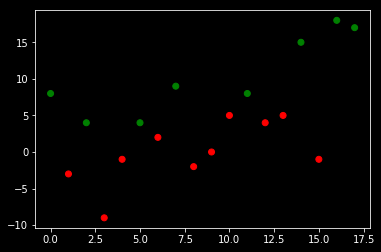

In [5]:

# Generate samples
n_samples = np.random.randint(10, 100)
points, labels = generate_data(n_samples)
plot_generated_data(points, labels)

Iteration: 3 weights: [-14.  22.  -2.]
Weights after training: [-14.  22.  -2.]


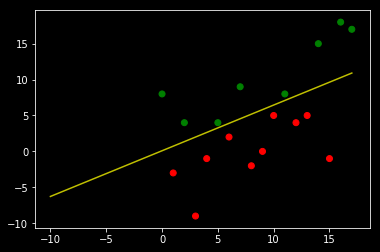

In [6]:
perc.train(points, labels)
print(f"Weights after training: {perc.w}")
plot_predicted_weights(perc.w, points, labels)


prediction: 1 point: [-4, 3]


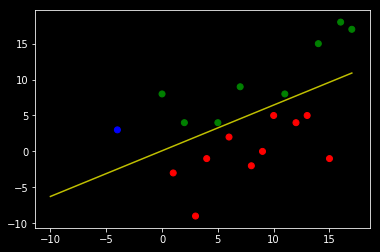

In [7]:
# Test Data
slope = -perc.w[0]/perc.w[1]
x, y = np.random.randint(-10, 30), np.random.randint(-10, 30)
p = perc.predict(np.array([x, y, 1]))
print(f"prediction: {p} point: [{x}, {y}]")

new_data = points.copy()
new_data.append(np.array([x,y]))
new_labels = labels + [0]
plot_predicted_weights(perc.w, new_data, new_labels)